# ISYS 620 DATA ANALYTICS WITH ARTIFICIAL INTELLIGENCE

# Data Set

COVID-19 Open Research Dataset Challenge (CORD-19)

# Approach

#### We have taken the following approach to analyze the abstracts of the documents in the dataset:
    1. Load the meta data sheet of the dataset 
    2. Perform some exploratory data analysis
    3. Perform data cleaning
    4. Consider subset of the data to apply machine learning models : Nov - Dec 2019. Increase the training data set to 2019 and 2020 based on the algorithm learning.
    5. Parse the data by using NLP packages- tokenize, remove stop words and stem the words on the "abstract" feature of the data
    6. Vectorize the data using TF-IDF. We will get multiple features for the same data.
    7. Apply dimensionality reduction using PCA (Principal component analysis) and reduce the dimensions before applying ML models.
    8. Apply K-Means clustering to the reduced dimensions' dataset in order to create clusters of documents which are similar in their abstracts.
    9. Analyse the results of K means and choose the right number of clusters using Elbow method and Silhouette score.
    10. Apply hierarchical clustering on the same dataset to identify clusters.
    11. Create a corpus and a dictionary of the words in the abstracts of all the documents. This is a prerequisite to run LDA.
    12. Using gensim's LDA (Latent Dirichlet Allocation) learning method, identify the key topics that could be learnt from the abstracts of the clusters in k means.
    13. Using word cloud, analyse the key words discussed in the clusters from Hierarchical clustering.
    12. Analyse the results.

# Next steps / Future scope

1. Introduce more business/ domain oriented data cleaning and exploratory analysis steps
2. Identifying Bigrams and Trigrams and lemmatize before performing LDA
3. Use the models built on other datasets
4. Extend the model to analyse body text of the documents
5. Rerun the k means algorithm for more variance values

In [1]:
import datetime
currentDT = datetime.datetime.now()
print ("Execution Start time : " , str(currentDT))

Execution Start time :  2020-05-03 17:08:24.498730


# 1. Prerequisites Installation and Import required libraries

## 1.1 Complete the following installations if not already present on Anaconda Powershell

conda install -c plotly plotly

python -m nltk.downloader all

pip install wordcloud

pip install stop_words

pip install pyLDAvis

pip install gensim

#conda install -c conda-forge spacy-model-en_core_web_md 

## 1.2 Import the below libraries once the required packages are installed

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

## Plotly's Python graphing library makes interactive, publication-quality graphs.
## To install plotly in windows on anaconda run the below command. 
## conda install -c plotly plotly
import plotly.figure_factory as ff
import re

In [3]:
from pathlib import Path # required for getting the path of the current directory
import glob #required to acLcess all files of same type inside a directory
import os  #required for accessing files at a path
import json # required for working with json files
import csv
import fnmatch
## Run the below command for installing NLTK
## python -m nltk.downloader all
#pip install wordcloud (basic version) Refer : https://www.datacamp.com/community/tutorials/wordcloud-python
import nltk 
from nltk.corpus import stopwords 
from wordcloud import WordCloud
#NLP package natural language toolkit to work with human language data : https://pythonspot.com/category/nltk/
#nltk corpus - In linguistics, a corpus (plural corpora) or text corpus is a large and structured set of texts. 
#In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or 
#validating linguistic rules within a specific language territory.
#In computing, stop words are words which are filtered out before or after processing of natural language data (text). 
#Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop 
#words used by all natural language processing tools, and indeed not all tools even use such a list. 
#Some tools specifically avoid removing these stop words to support phrase search.

# 2. Load the dataset

## 2.1  Load the meta data spreadsheet of the CORD dataset in a pandas dataframe

In [4]:
docmetadata= pd.read_csv("metadata.csv")

In [5]:
docmetadata.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


##### Section removed : 2.2 Load the ~52000 json files

##### BEGIN

#### Note- Use the below blocks of code when json files have to be extracted. Below is a sample where a list of dictionaries is created for all json files in the given folder. Each dictionary has the id of the paper and the body of the document concatenated.

##### END

# 3. Exploratory Data Analysis

## 3.1 Create a format to have a preview of the metadata
Create a format that contains a preview of the title, abstract and authors. Also make athe url clickable so that it can be easily accessed from the notebook. It will be easy to cross check things from articles and preview of text data

In [6]:
simple_schema = ['cord_uid','source_x', 'title', 'abstract', 'authors', 'full_text_file', 'url']
def make_clickable(address):
    '''Make the url clickable'''
    return '<a href="{0}">{0}</a>'.format(address)

def preview(text):
    '''Show only a preview of the text data.'''
    return text[:30] + '...'

format_ = {'title': preview, 'abstract': preview, 'authors': preview, 'url': make_clickable}

docmetadata[simple_schema].head(5).style.format(format_)

,cord_uid,source_x,title,abstract,authors,full_text_file,url
0,xqhn0vbp,PMC,Airborne rhinovirus detection ...,"BACKGROUND: Rhinovirus, the mo...","Myatt, Theodore A; Johnston, S...",custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC140314/
1,gi6uaa83,PMC,Discovering human history from...,Recent analyses of human patho...,"Disotell, Todd R...",custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC156578/
2,le0ogx1s,PMC,A new recruit for the army of ...,"The army of the men of death, ...","Petsko, Gregory A...",custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC193621/
3,fy4w7xz8,PMC,Association of HLA class I wit...,BACKGROUND: The human leukocyt...,"Lin, Marie; Tseng, Hsiang-Kuan...",custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC212558/
4,0qaoam29,PMC,A double epidemic model for th...,BACKGROUND: An epidemic of a S...,"Ng, Tuen Wai; Turinici, Gabrie...",custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC222908/


In [7]:
#Number of articles in the metadata
print("Number of articles in the metadata excel is : " , len(docmetadata))

Number of articles in the metadata excel is :  52398


In [8]:
docmetadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52398 entries, 0 to 52397
Data columns (total 18 columns):
cord_uid                       52398 non-null object
sha                            39024 non-null object
source_x                       52398 non-null object
title                          52240 non-null object
doi                            49058 non-null object
pmcid                          43652 non-null object
pubmed_id                      38058 non-null float64
license                        52398 non-null object
abstract                       43168 non-null object
publish_time                   52390 non-null object
authors                        50119 non-null object
journal                        47156 non-null object
Microsoft Academic Paper ID    964 non-null float64
WHO #Covidence                 1768 non-null object
has_pdf_parse                  52398 non-null bool
has_pmc_xml_parse              52398 non-null bool
full_text_file                 43794 non-null ob

## 3.2 Check for null values in the metadata dataset

In [9]:
docmetadata.isnull().sum()

cord_uid                           0
sha                            13374
source_x                           0
title                            158
doi                             3340
pmcid                           8746
pubmed_id                      14340
license                            0
abstract                        9230
publish_time                       8
authors                         2279
journal                         5242
Microsoft Academic Paper ID    51434
WHO #Covidence                 50630
has_pdf_parse                      0
has_pmc_xml_parse                  0
full_text_file                  8604
url                              302
dtype: int64

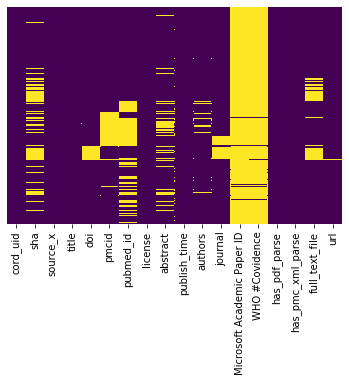

In [10]:
sns.heatmap(docmetadata.isnull(),yticklabels=False,cbar=False,cmap="viridis")

#### The heatmap above provides evidence that there are features which have a lot of nulls in them: the majority being in 
sha                            13374

pubmed_id                      14340

WHO #Covidence                 50630

Microsoft Academic Paper ID    51434

## 3.3 Checking the count of articles from different sources 

In [11]:
docmetadata['source_x'].value_counts()

PMC         29086
Elsevier    19995
medrxiv      1351
WHO           992
biorxiv       867
CZI           107
Name: source_x, dtype: int64

#### We can see that the majority of the articles are coming from PMC and Elsevier.

In [12]:
docmetadata['abstract'].describe(include='all')

count       43168
unique      42762
top       Unknown
freq          338
Name: abstract, dtype: object

In [13]:
docmetadata.drop_duplicates(['abstract'], inplace=True)
docmetadata['abstract'].describe(include='all')

count                                                 42762
unique                                                42762
top       Hepatitis E virus (HEV) and porcine reproducti...
freq                                                      1
Name: abstract, dtype: object

#### In some cases, some authors might have submitted their research papers at multiple locations leading to duplicates. Thes have been removed in the above step.

## 3.4 Abstract words distribution - visualize the count of words in articles

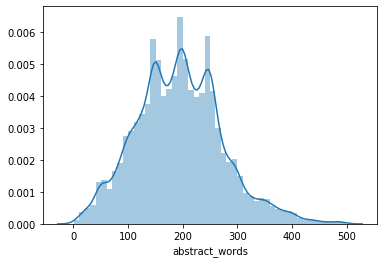

In [14]:
## If thowing any error for plot, install plotly in windows on anaconda run the below command. 
## conda install -c plotly plotly

def abstract_len(a):
    if type(a) is str:
        return len(a.split())
    else:
        return 0

docmetadata["abstract_words"] = docmetadata["abstract"].apply(abstract_len)
num_of_word = docmetadata.query("abstract_words != 0 and abstract_words <500")["abstract_words"]

sns.distplot(num_of_word)

#### In above plot  shows that abstract length has word density at around 100-300 words. 

## 3.5 Check the count of articles by published year

In [15]:
docmetadata['publish_time'].describe()

count     42756
unique     6242
top        2020
freq        465
Name: publish_time, dtype: object

[Text(0, 0, '1955'),
 Text(0, 0, '1973'),
 Text(0, 0, '1983'),
 Text(0, 0, '1993'),
 Text(0, 0, '2003'),
 Text(0, 0, '2013'),
 Text(0, 0, '')]

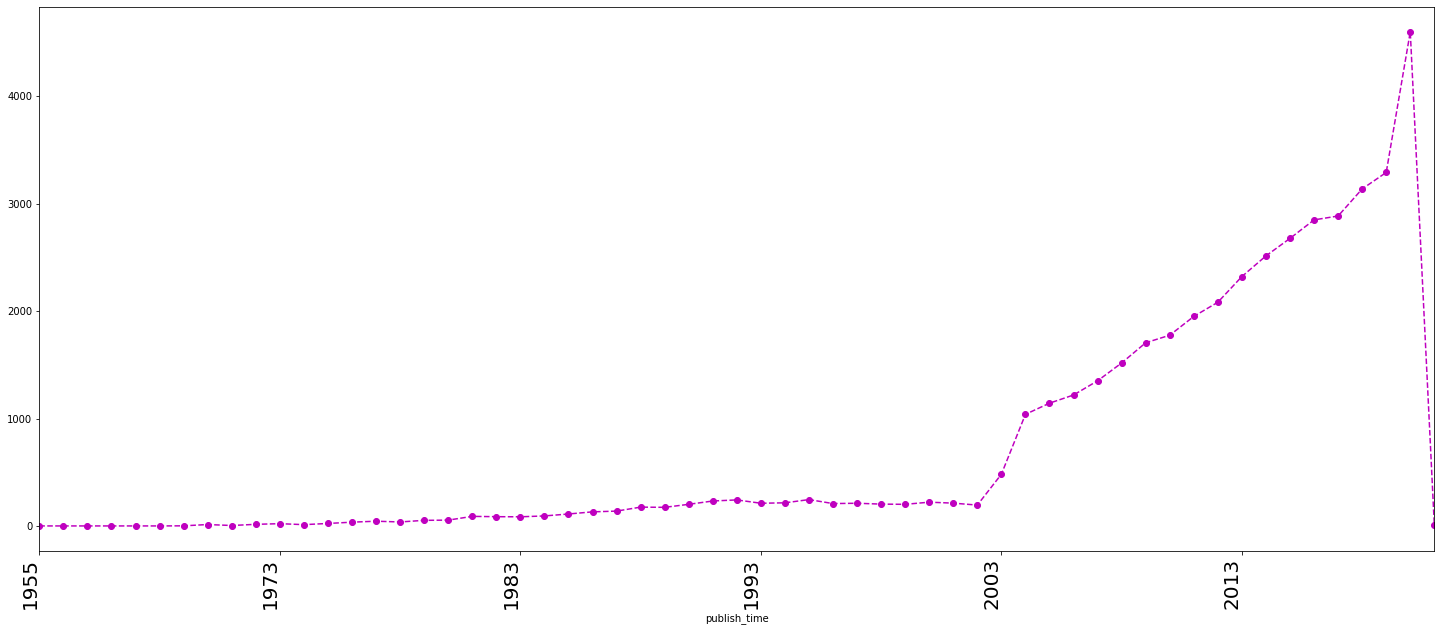

In [16]:
#define a function that returns the year component from date
def get_year(dt):
    dt=str(dt)
    year= dt.split('-')
    return year[0]

#Check the count of articles published by year in this dataset
plt.figure(figsize=(25,10))
#domainplot= sns.countplot(yearvise_articles)
#docmetadata.groupby(docmetadata['publish_time'].apply(get_year))['cord_uid'].count().sort_values(ascending=False).head(20)
domainplot=docmetadata.groupby(docmetadata['publish_time'].apply(get_year))['cord_uid'].count().plot(linestyle='--', marker='o', color='m')
domainplot.set_xticklabels(domainplot.get_xticklabels(),rotation=90, ha="right",fontsize=20)


## 3.6 Explore the data by dividing it for COVID, SARS, MERS

#### Since the analysis mainly focused on treatment methods used for COVID-19 patients, we can apply some filters on the articles based on their publishment date.

According to WHO, wikipedia, and other sources, there were similar outbreaks in the past century. 

If we limit our search to corona related outbreaks, then there are two more- SARS- CoV and MERS-CoV

Reference : https://www.reuters.com/article/us-china-health-virus-factbox/factbox-major-severe-coronavirus-outbreaks-in-the-past-20-years-idUSKBN1ZK2EI

All outbreaks till date- https://en.wikipedia.org/wiki/List_of_epidemics    -

a. Filtering the data as with article publishing dates in  2019 & 2020.

In [17]:
Covid19_2019_2020 = docmetadata[docmetadata['publish_time'].str.contains('2019') | docmetadata['publish_time'].str.contains('2020')]  
Covid19_2019_2020.name="Covid 19 Corona - 2019 ,2020"

b. Filtering the data for SARS- CoV years 2002 to 2004

In [18]:
SARS_2002_TO_2004 = docmetadata[docmetadata['publish_time'].str.contains('2002') | docmetadata['publish_time'].str.contains('2003')| docmetadata['publish_time'].str.contains('2004')]  
SARS_2002_TO_2004.name="SARS - 2002 to 2004"

c. Filtering the data for MERS- CoV years 2012 to 2014

In [19]:
MERS_2012_TO_2014 = docmetadata[docmetadata['publish_time'].str.contains('2012') | docmetadata['publish_time'].str.contains('2013')| docmetadata['publish_time'].str.contains('2014')]  
MERS_2012_TO_2014.name="MERS - 2012 to 2014"

In [20]:
print(Covid19_2019_2020['publish_time'].describe())
print(SARS_2002_TO_2004['publish_time'].describe())
print(MERS_2012_TO_2014['publish_time'].describe())

count     7887
unique     472
top       2020
freq       465
Name: publish_time, dtype: object
count     1716
unique     413
top       2004
freq        72
Name: publish_time, dtype: object
count           6916
unique           990
top       2014-12-31
freq             140
Name: publish_time, dtype: object


In [21]:
lst_Pandemic_Datasets=[Covid19_2019_2020,SARS_2002_TO_2004,MERS_2012_TO_2014]

We have now filtered our metadata set into three categories- COVID 19, SARS, MERS.

Below, we will check what are the most common words in all these data sets in terms of the titles and abstracts of the articles.

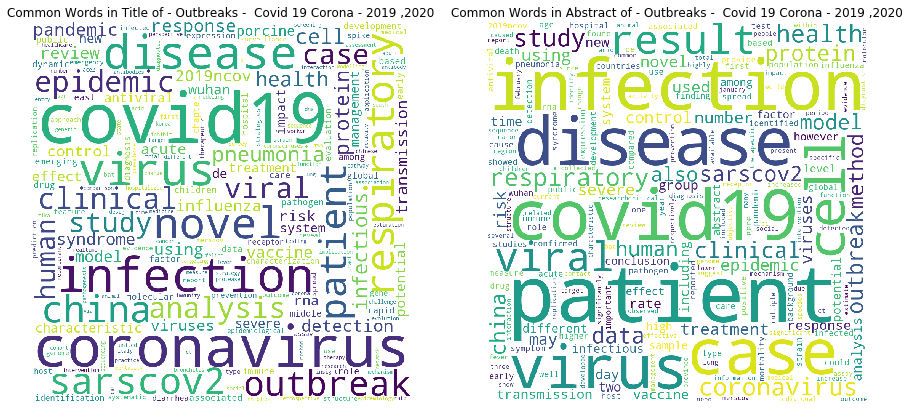

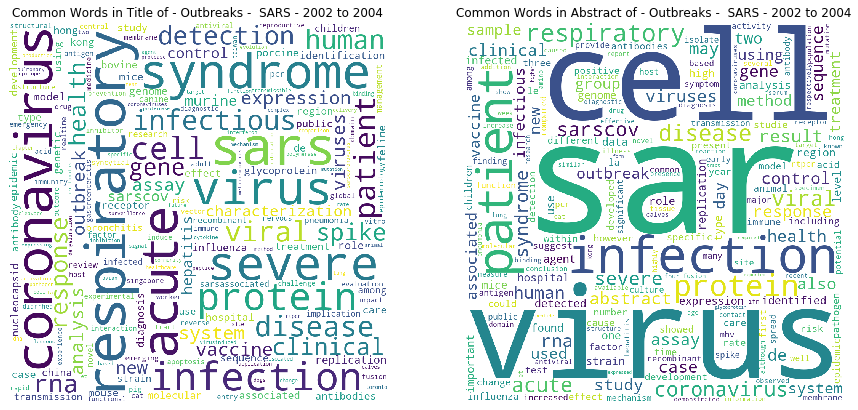

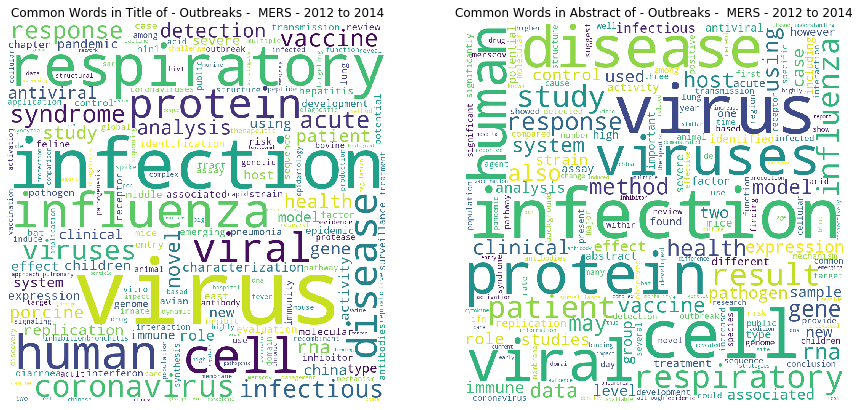

In [22]:
def lower_case(x):
    return x.lower()


for pandemic in lst_Pandemic_Datasets:
    #Dropping na values in title and abstract so that cleaning of text data can be done like converting to lower case, removing space
    df_title = pandemic.loc[:, ["title"]].dropna()
    df_abstract = pandemic.loc[:, ["abstract"]].dropna()
    #df_title.info()    
    #df_abstract.info()   

    #Clean the titles and join all the titles in that pandemic period into 1 string
    df_title["title"] = df_title['title'].apply(lambda x: lower_case(x))
    df_title["title"] = df_title['title'].apply(lambda x: x.strip())
    df_title["title"] = df_title['title'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    df_title["title"] = df_title['title'].apply(lambda x: re.sub(' +',' ',x))
    titles = ' '.join(df_title["title"])
    #Clean the abstracts and join all the abstracts in that pandemic period into 1 string

    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: lower_case(x))
    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: x.strip())
    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    df_abstract["abstract"] = df_abstract['abstract'].apply(lambda x: re.sub(' +',' ',x))
    abstracts = ' '.join(df_abstract["abstract"])
    
    stopword = stopwords.words('english')  # remove the stop words

    wordcloud_title = WordCloud(max_font_size=None, background_color='white', 
                          collocations=False, stopwords=stopword,
                          width=1000, height=1000).generate(titles)

    wordcloud_abstract = WordCloud(max_font_size=None, background_color='white', 
                          collocations=False, stopwords=stopword,
                          width=1000, height=1000).generate(abstracts)

    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(wordcloud_title)
    plt.title(f'Common Words in Title of - Outbreaks -  {pandemic.name}')
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(wordcloud_abstract)
    plt.title(f'Common Words in Abstract of - Outbreaks -  {pandemic.name}')
    plt.show()

In [23]:
type(wordcloud_title)

wordcloud.wordcloud.WordCloud

In [24]:
#Checking in titles and abstracts if above cleaning works..
print(titles[:100])
print(abstracts[:200])

internal versus external determinants of schistosoma japonicum transmission in irrigated agricultura
currently schistosomiasis transmission has been suppressed to low levels in many historically endemic areas of china by widespread use of praziquantel in human and bovine populations and application o


After checking what words are most common in title and abstract... may be we can plot of graph for most frequent words in abstract....

## 3.7 Explore the dataset based on languages used for writing the articles

In [25]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

### Lets filter the COVID data frame for records of November and December 2019 only for further analysis.

In [26]:
#Covid = docmetadata[docmetadata['publish_time'].str.contains('2019-11') | docmetadata['publish_time'].str.contains('2019-12')]  
Covid = docmetadata[docmetadata['publish_time'].str.contains('2019') | docmetadata['publish_time'].str.contains('2020')]  

In [27]:
Covid= Covid[Covid["abstract"].notna()] #.dropna(subset=["abstract"])

In [28]:
Covid.shape

(7887, 19)

In [29]:
Covid["Language"]=Covid["abstract"].apply(detect)

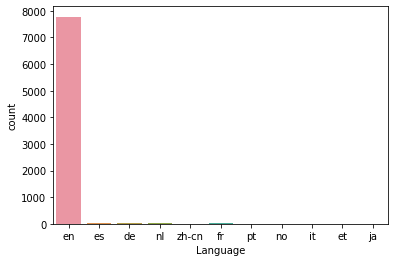

In [30]:
sns.countplot(Covid["Language"])

#### Drop the records where language is not English for a meaningful analysis.

In [31]:
Covid=Covid[Covid["Language"]=="en"]

In [32]:
Covid.shape

(7779, 20)

# 4. Data Cleaning

## 4.1 Let us apply cleaning functions on the COVID -19 time frame documents.

In [33]:
Covid.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_words,Language
9907,gcj14snd,1d05dbf38f98918269d71020f0c9ff616548c2df,PMC,Human rhinovirus spatial-temporal epidemiology...,10.12688/wellcomeopenres.14836.2,PMC6234744,30483602.0,cc-by,Background: Human rhinovirus (HRV) is the pred...,2019-03-27,"Morobe, John Mwita; Nyiro, Joyce U.; Brand, Sa...",Wellcome Open Res,NaN,NaN,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,300,en
10126,stu49tf5,584aa286fb6e7f2404ff67c5cfa025b33e110214,PMC,"Epidemiology of Imported Infectious Diseases, ...",10.3201/eid2501.180178,PMC6302593,30560778.0,no-cc,Imported infectious diseases are becoming a se...,2019-01-16,"Wang, Yali; Wang, Xuan; Liu, Xiaobo; Ren, Ruiq...",Emerg Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,137,en
10127,qlwzl5mq,4c7f6c52fe043745887db5406196b1d5099c9614,PMC,Multiple Introductions of Domestic Cat Feline ...,10.3201/eid2501.181347,PMC6302599,30561312.0,no-cc,The endangered Florida panther (Puma concolor ...,2019-01-16,"Chiu, Elliott S.; Kraberger, Simona; Cunningha...",Emerg Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,153,en
10165,eqgc8v7y,e5c06914d0daee6e881665b23adca340d0a6271a,PMC,Impact of glucose-6-phosphate dehydrogenase de...,10.1371/journal.pone.0209204,PMC6314580,30601843.0,cc-by,Glucose-6-phosphate dehydrogenase (G6PD) defic...,2019-01-02,"May, Win Lai; Kyaw, Myat Phone; Blacksell, Stu...",PLoS One,NaN,NaN,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,284,en
10194,hbpk850a,ca8f30a35b564945dd2588c382a0e181a1e08662,PMC,Mental health workers perceptions of disaster ...,10.1186/s12889-018-6313-9,PMC6318987,30606149.0,cc-by,BACKGROUND: The post-disaster mental health cr...,2019-01-03,"Xi, Yingjun; Chen, Runsen; Gillespie, Amy L.; ...",BMC Public Health,NaN,NaN,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,290,en


In [34]:
Covid.shape

(7779, 20)

In [35]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer

In [36]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')


# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents

abstracts=Covid.abstract

In [37]:
# list for tokenized documents in loop
texts = []
# loop through document list
for i in abstracts:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    #remove tokens less than length 3
    stemmed_len_tokens = [i for i in stemmed_tokens if len(i)>4]
    
    # add tokens to list
    texts.append(stemmed_len_tokens)
print(len(texts))


7779


In [38]:
Covid["processed_punctuation"]=texts

In [39]:
#Covid['processed']=Covid.processed_punctuation.apply(lambda x: ''.join(str(x)))
def joining(row):
    return ' '.join(row)
Covid['processed']=Covid.processed_punctuation.apply(joining)

#dont drop the processed_punctuation column
#processed_punctuation will be used further for LDA
#processed will be used further for Kmeans
#Covid.drop(columns="processed_punctuation", inplace=True)

In [40]:
Covid.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_words,Language,processed_punctuation,processed
9907,gcj14snd,1d05dbf38f98918269d71020f0c9ff616548c2df,PMC,Human rhinovirus spatial-temporal epidemiology...,10.12688/wellcomeopenres.14836.2,PMC6234744,30483602.0,cc-by,Background: Human rhinovirus (HRV) is the pred...,2019-03-27,...,NaN,NaN,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,300,en,"[background, human, rhinoviru, predomin, upper...",background human rhinoviru predomin upper resp...
10126,stu49tf5,584aa286fb6e7f2404ff67c5cfa025b33e110214,PMC,"Epidemiology of Imported Infectious Diseases, ...",10.3201/eid2501.180178,PMC6302593,30560778.0,no-cc,Imported infectious diseases are becoming a se...,2019-01-16,...,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,137,en,"[import, infecti, diseas, becom, seriou, publi...",import infecti diseas becom seriou public heal...
10127,qlwzl5mq,4c7f6c52fe043745887db5406196b1d5099c9614,PMC,Multiple Introductions of Domestic Cat Feline ...,10.3201/eid2501.181347,PMC6302599,30561312.0,no-cc,The endangered Florida panther (Puma concolor ...,2019-01-16,...,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,153,en,"[endang, florida, panther, concolor, coryi, ou...",endang florida panther concolor coryi outbreak...
10165,eqgc8v7y,e5c06914d0daee6e881665b23adca340d0a6271a,PMC,Impact of glucose-6-phosphate dehydrogenase de...,10.1371/journal.pone.0209204,PMC6314580,30601843.0,cc-by,Glucose-6-phosphate dehydrogenase (G6PD) defic...,2019-01-02,...,NaN,NaN,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,284,en,"[glucos, phosphat, dehydrogenas, defici, affec...",glucos phosphat dehydrogenas defici affect cli...
10194,hbpk850a,ca8f30a35b564945dd2588c382a0e181a1e08662,PMC,Mental health workers perceptions of disaster ...,10.1186/s12889-018-6313-9,PMC6318987,30606149.0,cc-by,BACKGROUND: The post-disaster mental health cr...,2019-01-03,...,NaN,NaN,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,290,en,"[background, disast, mental, health, crisi, in...",background disast mental health crisi interven...


# 5. Vectorization


Now that we have pre-processed the data, it is time to convert it into a format that can be handled by our algorithms. For this purpose we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    #vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(text)
    return X

In [42]:
text = Covid['processed'].values
X = vectorize(text,1000)
X.shape

(7779, 1000)

# 6. PCA

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, random_state=42)
X_reduced = pca.fit_transform(X.toarray())
X_reduced.shape

(7779, 688)

# 7. Hierarchical clustering

In [44]:
import scipy.cluster.hierarchy as sch

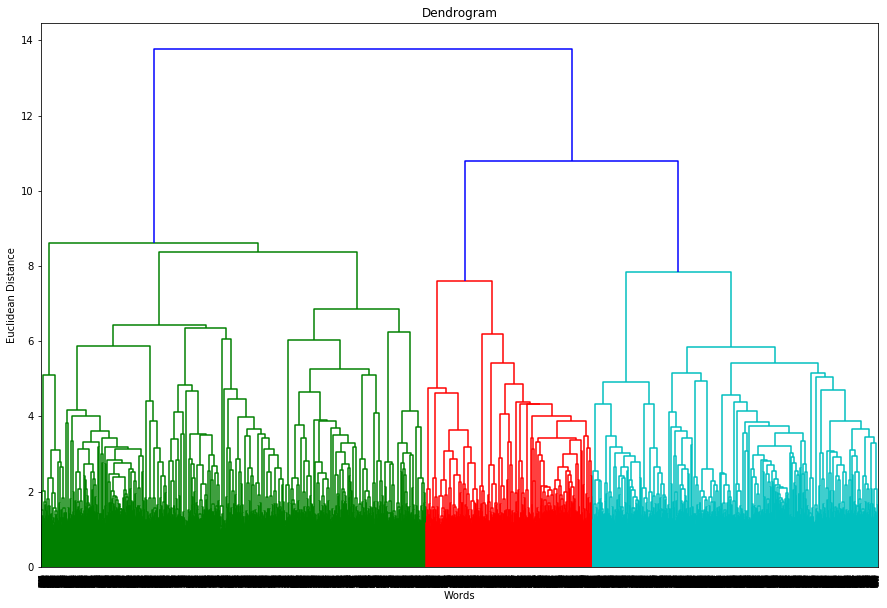

In [45]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Words")
plt.ylabel("Euclidean Distance")
plt.show()

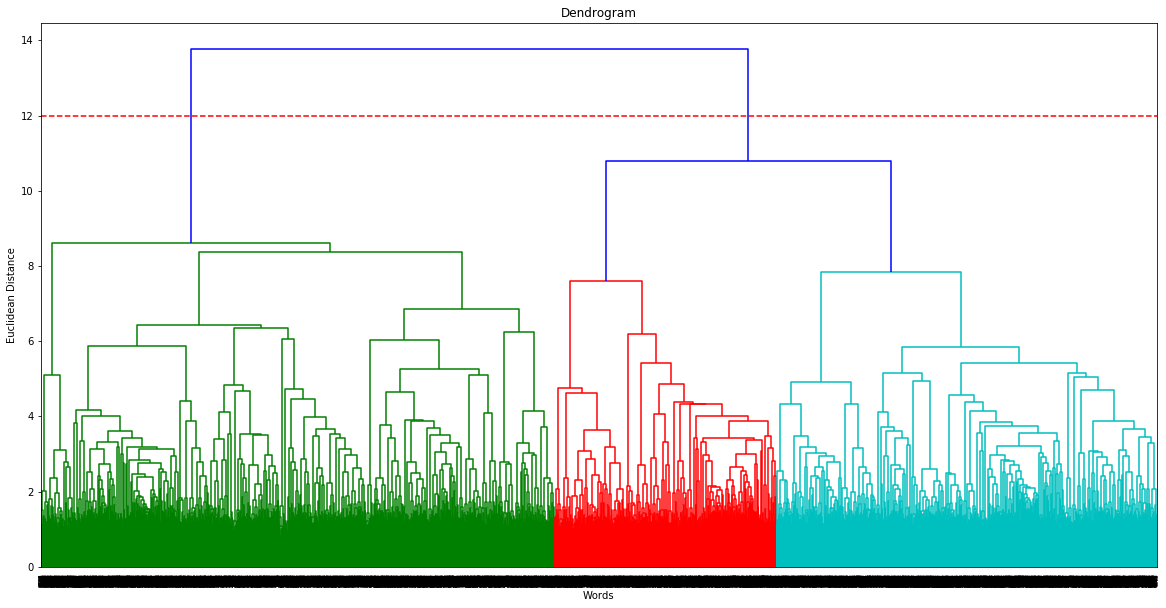

In [46]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_reduced, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Words")
plt.ylabel("Euclidean Distance")
plt.axhline(y=12,color="r",linestyle="--")
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward",affinity="euclidean")

In [49]:
pred= hc.fit_predict(X_reduced)

In [50]:
pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [51]:
Covid["HierarchicalCluster"]=pred

In [52]:
Covid["HierarchicalCluster"].value_counts()

0    4197
1    3582
Name: HierarchicalCluster, dtype: int64

#Check out Classification entropy
R-squared (RS) Distance between two clusters (CD)

### Lets take a look at what these clusters mean using wordcloud

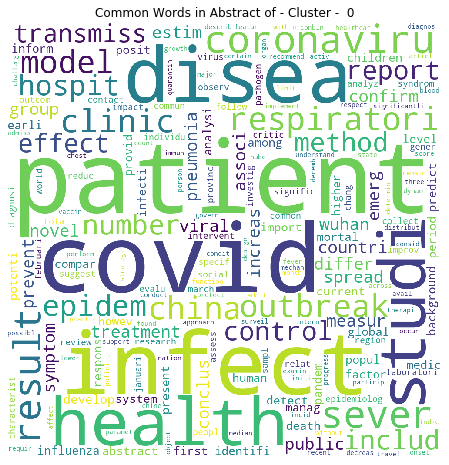

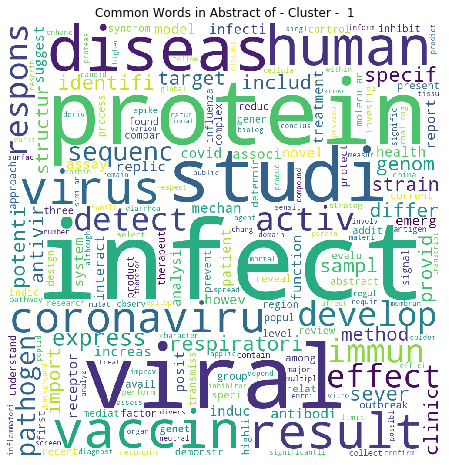

In [53]:
numberOfClusters=2
for i in range(0,numberOfClusters):
    cluster = Covid[Covid["HierarchicalCluster"]==i]
    abstracts = ' '.join(cluster["processed"])    
    stopword = stopwords.words('english')  # remove the stop words
    wordcloud_abstract = WordCloud(max_font_size=None, background_color='white', 
                          collocations=False, stopwords=stopword,
                          width=1000, height=1000).generate(abstracts)
    plt.figure(figsize=(8,8))
    plt.subplot(1,1,1)
    plt.axis("off")
    plt.imshow(wordcloud_abstract)
    plt.title(f'Common Words in Abstract of - Cluster -  {i}')
    plt.show()

# 8. K means Clustering

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',random_state=42)

In [56]:
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [57]:
pred=kmeans.predict(X_reduced)

In [58]:
kmeans.inertia_

6452.737001268235

In [59]:
from sklearn import metrics
metrics.silhouette_score(X_reduced, pred)

0.01859462328341841

In [60]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_reduced)
    pred=kmeans.predict(X_reduced)
    wcss.append(kmeans.inertia_)

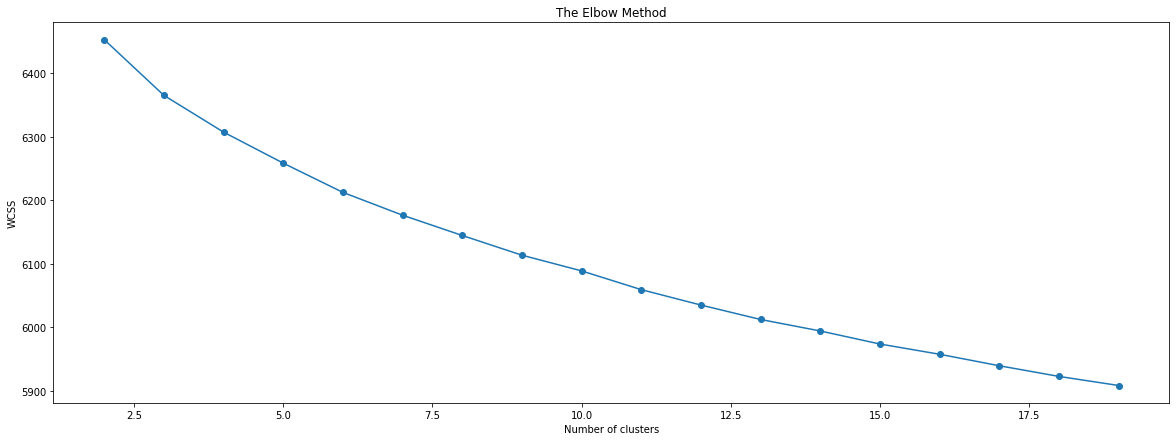

In [61]:
plt.figure(figsize=(20,7))
plt.plot(range(2, 20), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the elbow method visualization, there 

In [62]:
s_score = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_reduced)
    pred=kmeans.predict(X_reduced)
    s_score.append(metrics.silhouette_score(X_reduced, pred))

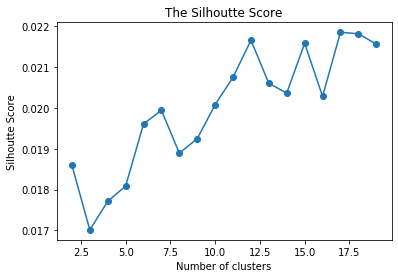

In [63]:
plt.plot(range(2, 20), s_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [64]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
kmeans.fit(X_reduced)
pred = kmeans.predict(X_reduced)

In [65]:
pred

array([3, 1, 3, ..., 0, 2, 1])

In [66]:
Covid['KMeansCluster'] = pred

In [67]:
Covid.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,abstract_words,Language,processed_punctuation,processed,HierarchicalCluster,KMeansCluster
9907,gcj14snd,1d05dbf38f98918269d71020f0c9ff616548c2df,PMC,Human rhinovirus spatial-temporal epidemiology...,10.12688/wellcomeopenres.14836.2,PMC6234744,30483602.0,cc-by,Background: Human rhinovirus (HRV) is the pred...,2019-03-27,...,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,300,en,"[background, human, rhinoviru, predomin, upper...",background human rhinoviru predomin upper resp...,0,3
10126,stu49tf5,584aa286fb6e7f2404ff67c5cfa025b33e110214,PMC,"Epidemiology of Imported Infectious Diseases, ...",10.3201/eid2501.180178,PMC6302593,30560778.0,no-cc,Imported infectious diseases are becoming a se...,2019-01-16,...,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,137,en,"[import, infecti, diseas, becom, seriou, publi...",import infecti diseas becom seriou public heal...,1,1
10127,qlwzl5mq,4c7f6c52fe043745887db5406196b1d5099c9614,PMC,Multiple Introductions of Domestic Cat Feline ...,10.3201/eid2501.181347,PMC6302599,30561312.0,no-cc,The endangered Florida panther (Puma concolor ...,2019-01-16,...,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,153,en,"[endang, florida, panther, concolor, coryi, ou...",endang florida panther concolor coryi outbreak...,1,3
10165,eqgc8v7y,e5c06914d0daee6e881665b23adca340d0a6271a,PMC,Impact of glucose-6-phosphate dehydrogenase de...,10.1371/journal.pone.0209204,PMC6314580,30601843.0,cc-by,Glucose-6-phosphate dehydrogenase (G6PD) defic...,2019-01-02,...,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,284,en,"[glucos, phosphat, dehydrogenas, defici, affec...",glucos phosphat dehydrogenas defici affect cli...,1,4
10194,hbpk850a,ca8f30a35b564945dd2588c382a0e181a1e08662,PMC,Mental health workers perceptions of disaster ...,10.1186/s12889-018-6313-9,PMC6318987,30606149.0,cc-by,BACKGROUND: The post-disaster mental health cr...,2019-01-03,...,True,True,comm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,290,en,"[background, disast, mental, health, crisi, in...",background disast mental health crisi interven...,0,1


In [68]:
Covid['KMeansCluster'].value_counts()

4    1589
2     939
0     852
6     835
7     785
1     710
5     651
8     573
3     539
9     306
Name: KMeansCluster, dtype: int64

In [69]:
print(kmeans.cluster_centers_)

[[ 2.31744805e-01  1.96535972e-01 -5.01492434e-02 ... -3.76104007e-04
   1.24574588e-04 -2.36301886e-05]
 [ 4.99594809e-02 -1.25920961e-01 -1.31811703e-02 ...  2.67784022e-04
   8.94667218e-04  3.79470597e-04]
 [-1.68240647e-01  6.19143946e-02 -1.02774226e-01 ... -6.38309323e-04
  -5.15533809e-04 -4.71122127e-04]
 ...
 [ 1.02269887e-01 -1.97590125e-01 -1.50866272e-02 ... -8.71104052e-05
  -6.79361675e-04 -6.13835440e-04]
 [-1.92493514e-01  3.06247431e-02 -6.86847800e-02 ...  6.03055345e-04
   6.51824609e-04  9.54169806e-04]
 [-1.55053456e-01 -6.49099188e-03 -4.82086184e-02 ... -5.54154108e-04
   3.91316639e-04 -1.93689232e-04]]


In [70]:
print(kmeans.labels_)

[3 1 3 ... 0 2 1]


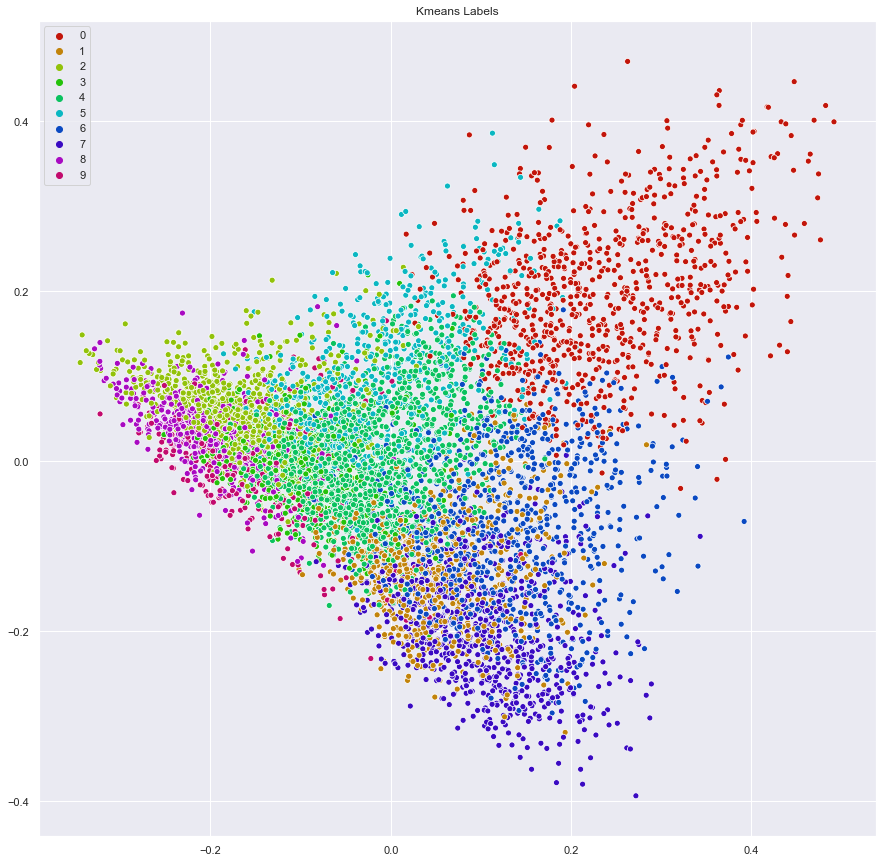

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(10, l=.4, s=.9)

# plot
sns.scatterplot(X_reduced[:,0], X_reduced[:,1], hue=pred, legend='full', palette=palette)
plt.title('Kmeans Labels')
plt.show()

### Lets visualize what each of these clusters are telling us

<Figure size 1440x1440 with 0 Axes>

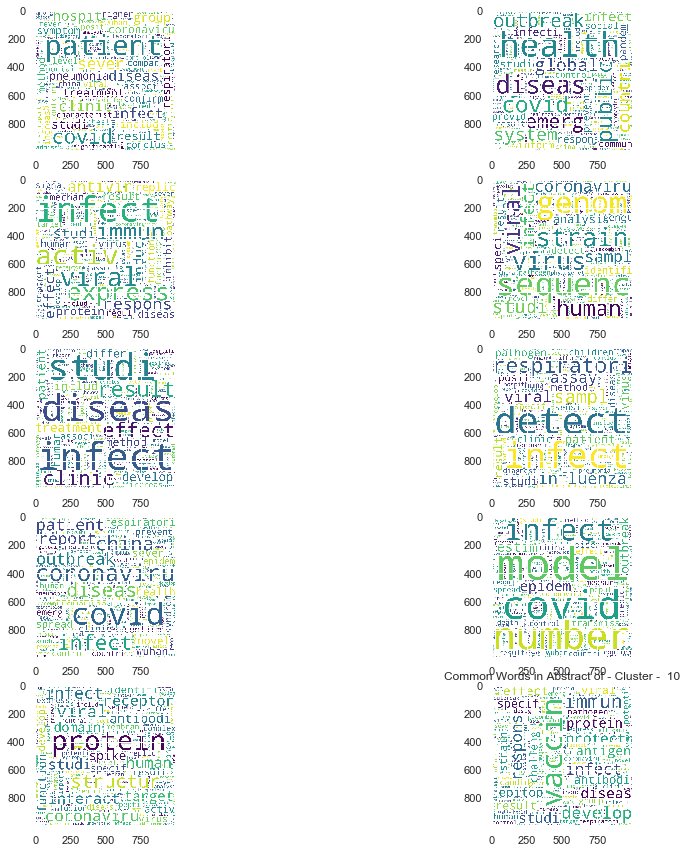

In [72]:
numberOfClusters=10
plt.figure(figsize=(20,20))
fig, axes = plt.subplots(nrows=5, ncols=2)

for i,ax in zip(range(1,numberOfClusters+1),axes.flatten()):
    cluster = Covid[Covid["KMeansCluster"]==i-1]
    abstracts = ' '.join(cluster["processed"])    
    stopword = stopwords.words('english')  # remove the stop words
    wordcloud_abstract = WordCloud(max_font_size=None, background_color='white', 
                          collocations=False, stopwords=stopword,
                          width=1000, height=1000).generate(abstracts)
    #plt.subplot(4,2,ax)
    #plt.axis("off")
    ax.imshow(wordcloud_abstract)
    plt.title(f'Common Words in Abstract of - Cluster -  {i}')
    #plt.show()

# 7. LDA

The way regular LDA works is, first each word is randomly assigned to a topic. This initialization can be controlled with Dirichlet priors via the Alpha parameter. That’s where LDA (Latent Dirichlet Allocation) gets it’s name. This randomness could be uniform initialization if the alpha is large, or skewed initialization when the alpha is small. Let’s go ahead with uniform initialization for now.



Ref: https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html

In [73]:
from gensim import corpora, models
import gensim
#import gensim ,spacy ,logging, warnings
import gensim.corpora as corpora
#from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [74]:
numberOfClusters=10
for i in range(0,numberOfClusters):
    cluster = Covid[Covid["KMeansCluster"]==i]
    texts= cluster["processed_punctuation"]
    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    # generate LDA model
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=10)
    print("Main topics for Cluster number: ", i)
    print(ldamodel.print_topics(num_topics=5, num_words=5))
    

Main topics for Cluster number:  0
[(0, '0.045*"patient" + 0.021*"infect" + 0.016*"viral" + 0.015*"associ" + 0.014*"mortal"'), (1, '0.059*"patient" + 0.025*"covid" + 0.015*"hospit" + 0.013*"infect" + 0.009*"diseas"'), (2, '0.055*"patient" + 0.025*"covid" + 0.019*"clinic" + 0.013*"pneumonia" + 0.012*"result"'), (3, '0.064*"patient" + 0.027*"covid" + 0.020*"sever" + 0.015*"group" + 0.015*"clinic"'), (4, '0.033*"covid" + 0.033*"patient" + 0.017*"studi" + 0.016*"diseas" + 0.015*"sever"')]
Main topics for Cluster number:  1
[(0, '0.033*"health" + 0.009*"prevent" + 0.009*"system" + 0.009*"global" + 0.009*"outbreak"'), (1, '0.030*"diseas" + 0.023*"health" + 0.014*"infecti" + 0.012*"public" + 0.009*"outbreak"'), (2, '0.023*"covid" + 0.021*"health" + 0.014*"pandem" + 0.012*"patient" + 0.010*"infect"'), (3, '0.026*"health" + 0.023*"emerg" + 0.011*"diseas" + 0.011*"public" + 0.010*"human"'), (4, '0.032*"health" + 0.016*"public" + 0.012*"diseas" + 0.011*"research" + 0.011*"countri"')]
Main topics 

In [75]:
import datetime
currentDT_End = datetime.datetime.now()
print ("Execution Start time : " , str(currentDT))
print ("Execution End time : " , str(currentDT_End))
print ("Execution End time : " , str(currentDT_End- currentDT))

Execution Start time :  2020-05-03 17:08:24.498730
Execution End time :  2020-05-03 17:31:36.914047
Execution End time :  0:23:12.415317
